# Classification Assignment 3

In this assignment, you will be working with a dummy advertising data set, which indicates whether an internet user clicked on an advertisement on a company website. Create a model that will predict whether a user will click on an ad based on the profile of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not the consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

For the dataset (Advertising dataset), implement the Decision Tree classifier using Python.

QUESTIONS:

Q-1: Load the dataset and print the metadata in the notebook.<br/>
Q-2: Print a heatmap to check NULL values.<br/>
Q-3: Perform stratified splitting of train and test data.<br/>
Q-4: Build a classifier model using the Decision Tree algorithm.<br/>
Q-5: Print confusion matrix and classification report before and after pruning the Decision tree.<br/>
Q-6: Plot the final decision tree model.<br/>
Q-7: Find out the stratified cross-validation accuracy.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [2]:
# Read input csv
data = pd.read_csv('advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.tail(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
990,35.79,44,33813.08,165.62,Enterprise-wide tangible model,North Katie,1,Tonga,2016-04-20 13:36:42,1
991,38.96,38,36497.22,140.67,Versatile mission-critical application,Mauricefurt,1,Comoros,2016-07-21 16:02:40,1
992,69.17,40,66193.81,123.62,Extended leadingedge solution,New Patrick,0,Montenegro,2016-03-06 11:36:06,1
993,64.20,27,66200.96,227.63,Phased zero tolerance extranet,Edwardsmouth,1,Isle of Man,2016-02-11 23:45:01,0
994,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [4]:
# Printing shape of input dataset - number of rows & columns
data.shape

(1000, 10)

In [5]:
# Printing schema of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


<b>Check for missing values - </b>

In [6]:
# Check for missing values
for col in data.columns:
    print(col, '-', data[col].isnull().sum())

Daily Time Spent on Site - 0
Age - 0
Area Income - 0
Daily Internet Usage - 0
Ad Topic Line - 0
City - 0
Male - 0
Country - 0
Timestamp - 0
Clicked on Ad - 0


<AxesSubplot:>

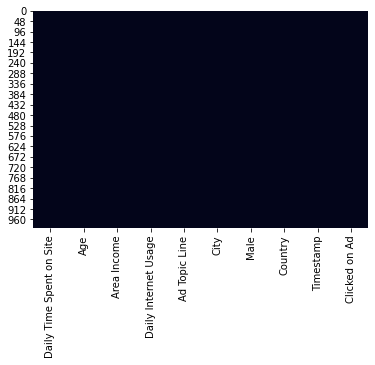

In [7]:
# Printing heatmap for null values
sns.heatmap(data.isnull(), cbar=False)

No features contains null values in the input dataset.

In [8]:
# Checking for duplicates
duplicates = data[data.duplicated()]
print(len(duplicates), ' duplicates found.')

0  duplicates found.


<b>Analysing 'Clicked on Ad' target variable -</b>

In [9]:
# Analysing the target variable - Clicked on Ad
person_clicked_ad = len(data[data['Clicked on Ad']==1])
person_not_clicked_ad = len(data[data['Clicked on Ad']==0])

print('People clicked on the ad     -', person_clicked_ad)
print('People not clicked on the ad -', person_not_clicked_ad)

People clicked on the ad     - 500
People not clicked on the ad - 500


We have equal percentage of people who clicked on ad & who didn't clicked on ad.

<b>Analysing 'Ad Topic Line' categorical variable -</b>

In [10]:
# Printing unique values for 'Ad Topic Line' column
data['Ad Topic Line'].value_counts()

Right-sized solution-oriented benchmark      1
Synergistic fresh-thinking array             1
Focused coherent success                     1
Optional mission-critical functionalities    1
Exclusive disintermediate task-force         1
                                            ..
Object-based reciprocal knowledgebase        1
Reverse-engineered content-based intranet    1
Front-line bifurcated ability                1
Re-contextualized human-resource success     1
Intuitive exuding service-desk               1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [11]:
len(data['Ad Topic Line'].value_counts())

1000

'Ad Topic Line' column contains unique value for all 1000 rows, so it can be dropped from the input dataset.

<b>Dropping 'Ad Topic Line' column from dataframe -</b>

In [12]:
data.drop(['Ad Topic Line'], axis=1, inplace=True)
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country', 'Timestamp',
       'Clicked on Ad'],
      dtype='object')

'Ad Topic Line' successfully dropped from the input dataset.

<b>Analysing 'City' categorical variable -</b>

In [13]:
# Printing unique values present in 'City' variable
data['City'].value_counts()

Lisamouth           3
Williamsport        3
Millerbury          2
Millertown          2
Joneston            2
                   ..
Meaganfort          1
Bethburgh           1
East Jason          1
New Sharon          1
Port Angelamouth    1
Name: City, Length: 969, dtype: int64

'City' column contains 969 unique values for 1000 rows. We need to convert 'City' categorical feature to numerical features using dummy variables, to pass it to our model.

<b>Analysing 'Country' categorical variable -</b>

In [14]:
# Printing unique values present in 'Country' variable
data['Country'].value_counts()

Czech Republic      9
France              9
Afghanistan         8
Cyprus              8
Turkey              8
                   ..
Mozambique          1
Bermuda             1
Kiribati            1
Marshall Islands    1
Slovenia            1
Name: Country, Length: 237, dtype: int64

'Country' column contains 237 unique values for 1000 rows. We need to convert 'Country' categorical feature to numerical features using dummy variables, to pass it to our model.

<b>Analysing 'Timestamp' independent feature -</b>

In [15]:
data['Timestamp'].value_counts()

2016-03-17 23:39:28    1
2016-05-25 19:45:16    1
2016-01-02 14:36:03    1
2016-02-26 09:18:48    1
2016-06-17 17:11:16    1
                      ..
2016-02-02 11:49:18    1
2016-06-15 05:30:13    1
2016-02-11 17:02:07    1
2016-05-18 01:00:52    1
2016-04-04 13:56:14    1
Name: Timestamp, Length: 1000, dtype: int64

'Timestamp' column contains 1000 unique values for 1000 rows i.e. unique for each row. So, it can be dropped from the input dataset. <b>However, we can extract day, month, year & hour part from the timestamp to check for any impact on our model.</b>

In [16]:
# Extract year from the Timestamp feature
year_clicked = pd.to_datetime(data['Timestamp']).dt.year
year_clicked.value_counts().sort_index()

2016    1000
Name: Timestamp, dtype: int64

'Year Clicked' is same for all 1000 rows in our input dataset. So, we can ignore the 'Year Clicked' feature.

In [17]:
# Extract month from the Timestamp feature
data['Month Clicked'] = pd.to_datetime(data['Timestamp']).dt.month
data['Month Clicked'].value_counts().sort_index()

1    147
2    160
3    156
4    147
5    147
6    142
7    101
Name: Month Clicked, dtype: int64

Our dataset contains data for first seven months only from Jan-July.

In [18]:
# Extract day from the Timestamp feature
data['Day Clicked'] = pd.to_datetime(data['Timestamp']).dt.day
data['Day Clicked'].value_counts().sort_index()

1     33
2     25
3     46
4     36
5     35
6     25
7     32
8     35
9     34
10    37
11    32
12    29
13    30
14    33
15    41
16    35
17    42
18    35
19    29
20    33
21    32
22    24
23    35
24    33
25    23
26    36
27    35
28    30
29    29
30    28
31    18
Name: Day Clicked, dtype: int64

In [19]:
# Extract hour from the Timestamp feature
data['Hour Clicked'] = pd.to_datetime(data['Timestamp']).dt.hour
data['Hour Clicked'].value_counts().sort_index()

0     45
1     32
2     36
3     42
4     42
5     44
6     39
7     54
8     43
9     49
10    31
11    40
12    38
13    42
14    43
15    35
16    39
17    41
18    41
19    39
20    50
21    48
22    43
23    44
Name: Hour Clicked, dtype: int64

<b>Dropping 'Timestamp' column from the input dataset -</b>

In [20]:
data.drop(['Timestamp'], axis=1, inplace=True)
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country', 'Clicked on Ad',
       'Month Clicked', 'Day Clicked', 'Hour Clicked'],
      dtype='object')

'Timestamp' feature successfully dropped from the input dataset.

In [21]:
# Function to move target column to last column always
def move_target_to_last(dataframe):
    ad_clicked_col = dataframe.pop('Clicked on Ad')
    dataframe.insert(len(dataframe.columns), 'Clicked on Ad', ad_clicked_col)

In [22]:
# Move target column 'Clicked on Ad' to last column
move_target_to_last(data)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Month Clicked,Day Clicked,Hour Clicked,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,3,27,0,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,4,4,1,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,3,13,20,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,1,10,2,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,6,3,3,0


<b>Check correlation between various features -</b>

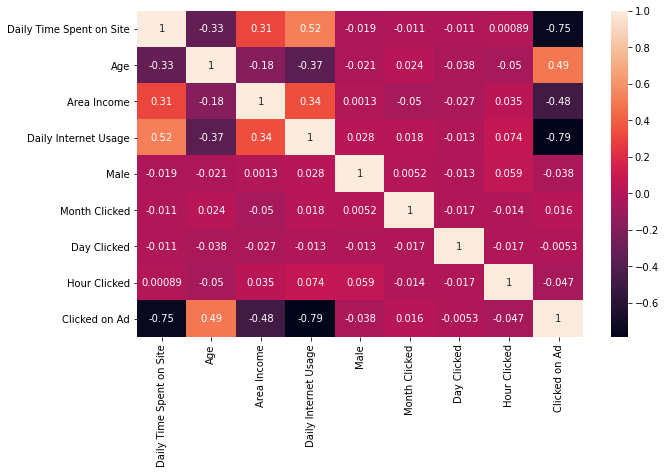

In [23]:
# Get corrleation between various features
corr = data.corr()

# Display heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

From the above, <br/>
1. 'Daily Time Spent on Site', 'Daily Internet Usage' features are strongly correlated to target variable 'Clicked on Ad' but in negative direction.
2. 'Age' feature is moderately correlated to the target feature
3. 'Area Income' feature is moderately correlated for the target feature in negative direction

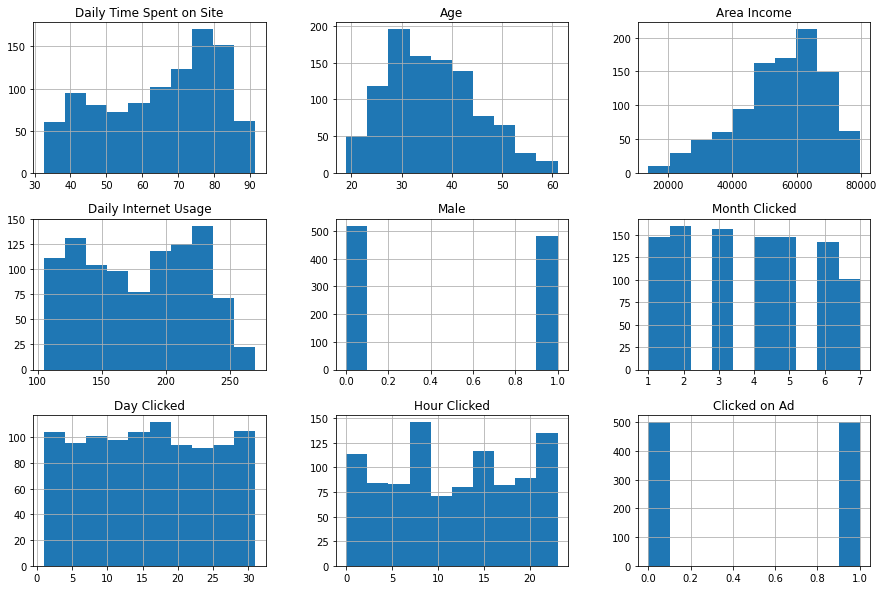

In [25]:
# Plotting histogram for all variables
data.hist(figsize = (15, 10))
plt.show()

Observations -
1. More males are present in the input dataset than females.
2. Input dataset contains data for month clicked from Jan to Jul only.
3. More data for people in the age range from 30 to 40.

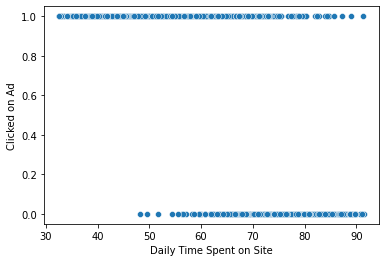

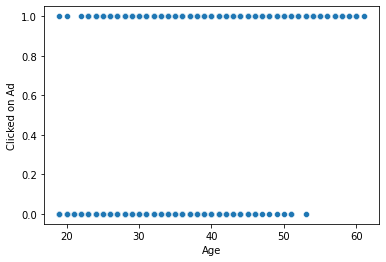

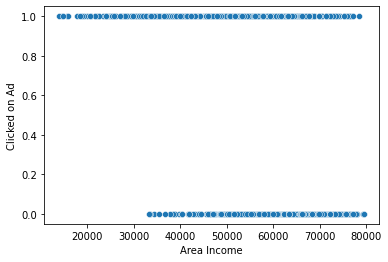

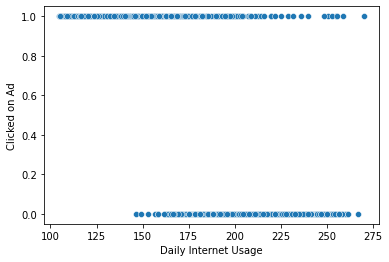

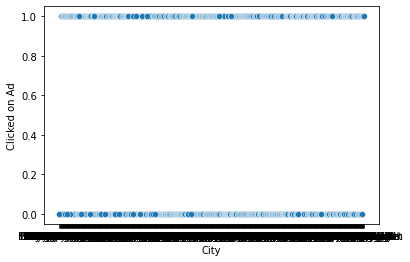

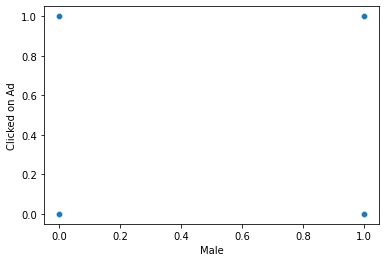

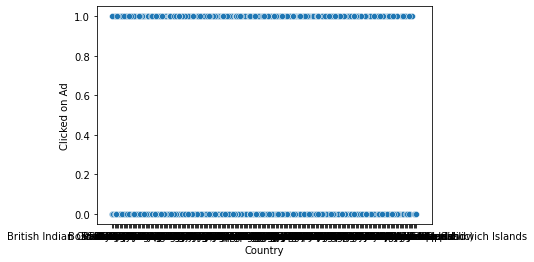

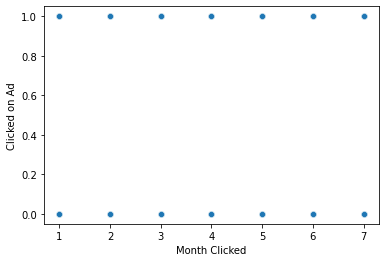

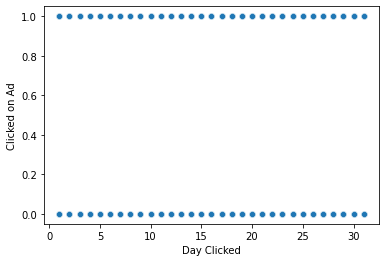

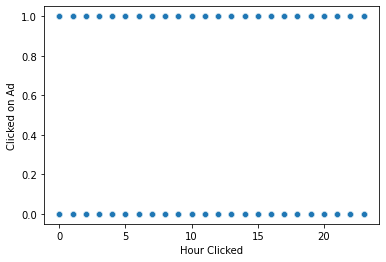

In [35]:
# Plotting scatter plots for all independent variables with target variable
input_data = data.iloc[:,0:len(data.columns)-1]

for col in input_data.columns:
    sns.scatterplot(x=input_data[col], y=data['Clicked on Ad'])
    plt.show()

In [36]:
# Extracting min & max age
min_age = data['Age'].min()
max_age = data['Age'].max()

print('Minimum Age is ', min_age)
print('Maximum Age is ', max_age)

Minimum Age is  19
Maximum Age is  61


In [37]:
# Divide age in to 4 bins
age_binned = pd.cut(data['Age'], bins=4)
age_binned.value_counts()

(29.5, 40.0]      447
(18.958, 29.5]    264
(40.0, 50.5]      217
(50.5, 61.0]       72
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

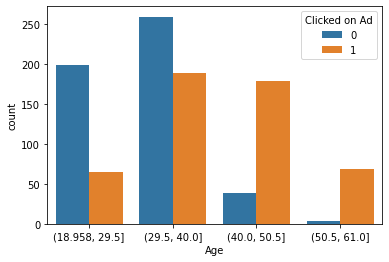

In [38]:
sns.countplot(x=age_binned, hue=data['Clicked on Ad'])

Observations -<br/>
1. Most of the data exists for age groups from 29.5 to 40.
2. People in the age range 18.95 to 29.5 have mostly ignored ads.
3. People in the age range 50.5 to 61 have clicked on ads more - may be because of there lack of awareness.

## Building various decision tree models using different set of features

### i) Build Decision Tree model by removing "City" & "Country" categorical features from the input dataset

In [39]:
# Creating a copy of original dataframe
df_wo_categories = data.copy(deep=True)
df_wo_categories.drop(['City', 'Country'], axis=1, inplace=True)

In [40]:
# Print all columns present in the dataframe
df_wo_categories.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Month Clicked', 'Day Clicked',
       'Hour Clicked', 'Clicked on Ad'],
      dtype='object')

In [41]:
# Function to split dataframe in to training & test data with scaling performed
def split_train_test_data_with_scaling(df):
    col_length = len(df.columns)
    X = df.iloc[:,0:col_length - 1]
    y = df.iloc[:, -1]
    
    # Split data into training & test data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)    
    print('Shape of training dataset -', X_train.shape)
    print('Shape of test dataset     -', X_test.shape)
    print('\n')
    
    # Applying Standard Scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

In [55]:
##
# Function to build multiple decision trees (to check for the one with best score) with different depth & 
#    critieria (gini or entropy).
##
def build_multiple_trees_with_diff_depth(X_train, X_test, y_train, y_test):
    max_depth = []
    accuracy_gini = []
    accuracy_entropy = []
    classifier_gini = []
    
    for i in range(1,30):
        # Building Decision Tree model using criteria as gini
        dtree = DecisionTreeClassifier(criterion="gini", max_depth=i)
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)
        accuracy_gini.append(accuracy_score(y_test, y_pred))
        classifier_gini.append(dtree)

        # Building Decision Tree model using criteria as entropy
        dtree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=i)
        dtree_entropy.fit(X_train, y_train)
        y_pred = dtree_entropy.predict(X_test)
        accuracy_entropy.append(accuracy_score(y_test, y_pred))

        # Storing depth in a series
        max_depth.append(i)
        
    # Creating dataframe of both accuracies, calculated using gini & entropy
    df_scores = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 'accuracy_entropy':pd.Series(accuracy_entropy), 'max_depth':pd.Series(max_depth)})
    
    # Visualizing changes in parameters
    plt.plot('max_depth', 'accuracy_gini', data=df_scores, label='gini')
    plt.plot('max_depth', 'accuracy_entropy', data=df_scores, label='entropy')
    plt.xlabel('max_depth')
    plt.ylabel('accuracy')
    plt.legend()
    
    return classifier_gini, max_depth

In [56]:
##
# Function to plot training vs test scores for decision tree model built with criteria as gini.
##
def plot_train_test_accuracy(X_train, X_test, y_train, y_test, classifier_gini, max_depth):
    # Generate training & test scores using decision tree model stored in classifier_gini array
    train_scores = [clf.score(X_train, y_train) for clf in classifier_gini]
    test_scores = [clf.score(X_test, y_test) for clf in classifier_gini]

    fig, ax = plt.subplots()
    ax.set_xlabel("max depth")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs Max depth for training and testing sets")
    ax.plot(max_depth, train_scores, marker='o', label="train", drawstyle="steps-post")
    ax.plot(max_depth, test_scores, marker='o', label="test", drawstyle="steps-post")

    ax.legend()
    plt.show()

Shape of training dataset - (700, 8)
Shape of test dataset     - (300, 8)


Plot accuracy of decision tree model with depth


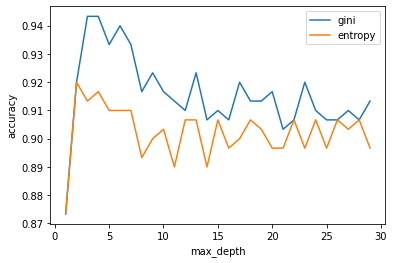

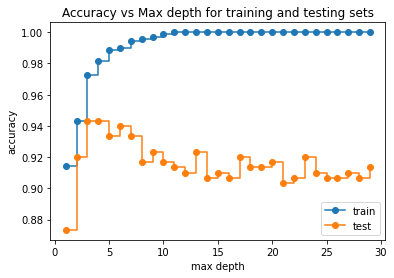

In [57]:
# Generate best fit model by dropping City & Country features from input dataset

# Split dataframe in to train & test dataset
X_train, X_test, y_train, y_test = split_train_test_data_with_scaling(df_wo_categories)

print('Plot accuracy of decision tree model with depth')
dt_classifiers, max_depth = build_multiple_trees_with_diff_depth(X_train, X_test, y_train, y_test)

# Plot train & test accuracies with depth
plot_train_test_accuracy(X_train, X_test, y_train, y_test, dt_classifiers, max_depth)

From the first graph (gini accuracy vs entropy accuracy), max accuracy (<b>of around .942 at depth of 3 or 4</b>), is shown when "gini" is used as a criteria to build model.<br/>
From the second graph (train vs test accuracy), similar observations holds true - max accuracy is around 0.942 for test data at a depth of 3 or 4.

### ii) Build Decision Tree model by converting 'City' & 'Country' categorical features to dummy features

Converting categorical variables - City & Country to dummy variables

In [58]:
# Creating a copy of original dataframe
df_categories = data.copy(deep=True)

# Creating dummy variables for City feature
df_categories = pd.get_dummies(df_categories, columns=['City'])

# Creating dummy variables for Country feature
df_categories = pd.get_dummies(df_categories, columns=['Country'])

# Printing shape of the updated dataframe
df_categories.shape

(1000, 1215)

New columns are added to the dataframe by converting categorical features 'City' & 'Country' to dummy features.

In [59]:
# Moving "Clicked on Ad" output column to the last
move_target_to_last(df_categories)
df_categories.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month Clicked,Day Clicked,Hour Clicked,City_Adamsbury,City_Adamside,...,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Clicked on Ad
0,68.95,35,61833.90,256.09,0,3,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,4,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,3,13,20,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,1,10,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,6,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape of training dataset - (700, 1214)
Shape of test dataset     - (300, 1214)


Plot accuracy of decision tree model with depth


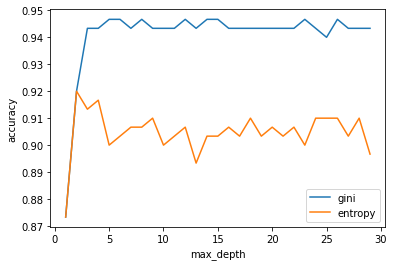

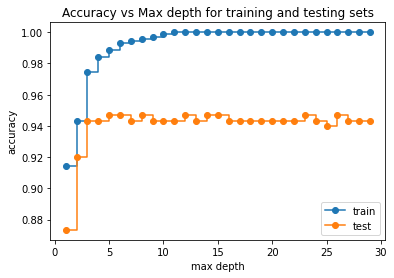

In [60]:
# Build best fit decision tree model for dataframe with city & country categorical features

# Split dataframe in to train & test dataset
X1_train, X1_test, y1_train, y1_test = split_train_test_data_with_scaling(df_categories)

print('Plot accuracy of decision tree model with depth')
dt1_classifiers, max_depth1 = build_multiple_trees_with_diff_depth(X1_train, X1_test, y1_train, y1_test)

# Plot train & test accuracies with depth
plot_train_test_accuracy(X1_train, X1_test, y1_train, y1_test, dt1_classifiers, max_depth1)

From the first graph (gini accuracy vs entropy accuracy), max accuracy (<b>of around .942 at depth of 7 or 8</b>), is shown when "gini" is used as a criteria to build model.<br/>
From the second graph (train vs test accuracy), similar observations holds true - max accuracy is around 0.942 for test data at a depth of 7 or 8.

### iii) Build Decision Tree model by dropping 'City' feature & converting 'Country' categorical values to dummy features

Convert only 'Country' categorical variable to dummy variables & drop 'City' variable

In [61]:
# Creating a copy of original dataframe
df_country_categories = data.copy(deep=True)

# Drop City feature
df_country_categories = df_country_categories.drop(['City'], axis=1)

# Creating dummy variables for Country feature
df_country_categories = pd.get_dummies(df_country_categories, columns=['Country'])

# Printing shape of the updated dataframe
df_country_categories.shape

(1000, 246)

New columns are added to the dataframe by converting categorical feature 'Country' to dummy features.

In [62]:
# Moving "Clicked on Ad" output column to the last
move_target_to_last(df_country_categories)
df_country_categories.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month Clicked,Day Clicked,Hour Clicked,Country_Afghanistan,Country_Albania,...,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Clicked on Ad
0,68.95,35,61833.90,256.09,0,3,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,1,4,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,3,13,20,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,1,1,10,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,6,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape of training dataset - (700, 245)
Shape of test dataset     - (300, 245)


Plot accuracy of decision tree model with depth


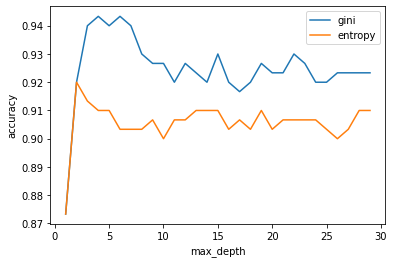

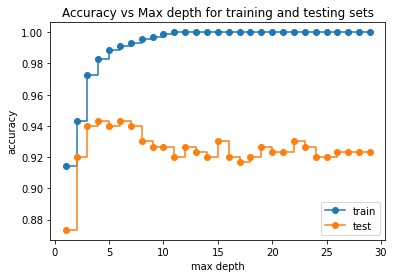

In [64]:
# Build best fit decision tree model for dataframe with country categorical features

# Split dataframe in to train & test dataset
X2_train, X2_test, y2_train, y2_test = split_train_test_data_with_scaling(df_country_categories)

print('Plot accuracy of decision tree model with depth')
dt2_classifiers, max_depth2  = build_multiple_trees_with_diff_depth(X2_train, X2_test, y2_train, y2_test)

# Plot train & test accuracies with depth
plot_train_test_accuracy(X2_train, X2_test, y2_train, y2_test, dt2_classifiers, max_depth2)

From the first graph (gini accuracy vs entropy accuracy), max accuracy (<b>of around .942 at depth of 6</b>), is shown when "gini" is used as a criteria to build model.<br/>
From the second graph (train vs test accuracy), similar observations holds true - max accuracy is around 0.942 for test data at a depth of 6.

<b>Among all the above three generated models, the accuracy score is almost same for all three models with a difference in depth.</b><br/>
1. Without City & Country features, Accuracy              - 0.942 & Depth - 3 or 4 <br/>
2. With City & Country features, Accuracy                 - 0.942 & Depth - 7 or 8 <br/>
3. With dropping City & keeping Country feature, Accuracy - 0.942 & Depth - 6 <br/>

We have seen that the highest accuracy is coming to be around 0.942 with depth - 6 after pruning.

<b>Going ahead with the third scenario (with dropping City & keeping Country feature), where is accuracy is higher i.e. 0.942 with smaller depth.</b>

### Building final decision tree model (based on scenario #3)

Building two decision tree models - one with depth as None & other with depth as 6, based on scenario #3 to print various metrics for comparison -

In [65]:
##
# Function to build final decision tree model & print various metrics
##
def build_final_decision_tree(df, depth=None, criteria="gini", show_accuracy=True, show_conf_matrix=True, show_classification=True):
    
    col_length = len(df.columns)
    X = df.iloc[:,0:col_length - 1]
    y = df.iloc[:, -1]
    
    # Split data into training & test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)    
    print('Shape of training dataset -', X_train.shape)
    print('Shape of test dataset     -', X_test.shape)
    print('\n')

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create DecisionTreeClassifier object & fit model
    classifier = DecisionTreeClassifier(criterion=criteria, max_depth=depth)
    classifier = classifier.fit(X_train, y_train)
    
    # Predict for test dataset
    y_pred = classifier.predict(X_test)
    
    print('Depth of tree:', classifier.get_depth())
    print('Score of tree:', classifier.score(X_test, y_test))
    print('\n')
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Accuracy & Confusion Matrix
    if show_accuracy == True:
        print('Accuracy Score (Training data):', accuracy_score(y_train, classifier.predict(X_train)))
        print('Accuracy Score (Test data):', accuracy_score(y_test, y_pred))
        print('\n')
    
    if show_conf_matrix == True:
        print('Confusion Matrix:', cm)
        print('\n')
    
    if show_classification == True:
        print('Classification Report:', classification_report(y_test, y_pred))
        print('\n')
    
    path = classifier.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    
    return classifier, cm

<b>Printing metrics like classification report, confusion matrix before pruning </b>i.e. df = df_country_categories, depth = None, critieria = 'gini' -

In [66]:
# Building final decision tree model with depth = None, criteria = gini, df = df_country_categories
clf, cm_before_pruning = build_final_decision_tree(df_country_categories)

Shape of training dataset - (700, 245)
Shape of test dataset     - (300, 245)


Depth of tree: 11
Score of tree: 0.9233333333333333


Accuracy Score (Training data): 1.0
Accuracy Score (Test data): 0.9233333333333333


Confusion Matrix: [[136  14]
 [  9 141]]


Classification Report:               precision    recall  f1-score   support

           0       0.94      0.91      0.92       150
           1       0.91      0.94      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300





<b>Printing metrics like classification report, confusion matrix after pruning </b>i.e. df = df_country_categories, depth = 6, critieria = 'gini' -

In [67]:
# Building final decision tree model with depth = 6, criteria = gini, df = df_country_categories
clf_pruned, cm_after_pruning = build_final_decision_tree(df_country_categories, 6, 'gini')

Shape of training dataset - (700, 245)
Shape of test dataset     - (300, 245)


Depth of tree: 6
Score of tree: 0.94


Accuracy Score (Training data): 0.9914285714285714
Accuracy Score (Test data): 0.94


Confusion Matrix: [[142   8]
 [ 10 140]]


Classification Report:               precision    recall  f1-score   support

           0       0.93      0.95      0.94       150
           1       0.95      0.93      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300





<b>Before pruning, the model accuracy was 0.92 with depth of 11 & after pruning, the accuracy of our model improved to 0.94 with depth of 6.</b>

Printing confusion matrix before pruning -

In [68]:
cm_before_pruning

array([[136,  14],
       [  9, 141]], dtype=int64)

Printing confusion matrix before pruning -

In [69]:
cm_after_pruning

array([[142,   8],
       [ 10, 140]], dtype=int64)

<b>Before pruning, there were 23 (14 + 9) false predictions and after pruning its reduced to 18 (10 + 8).</b>

### Printing pruned version of decision tree -

In [70]:
##
# Function to visualize the decision tree built
#
##
def visualize_tree(classifier, feature_cols):
    dot_data = StringIO()

    export_graphviz(classifier, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = feature_cols, class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return graph

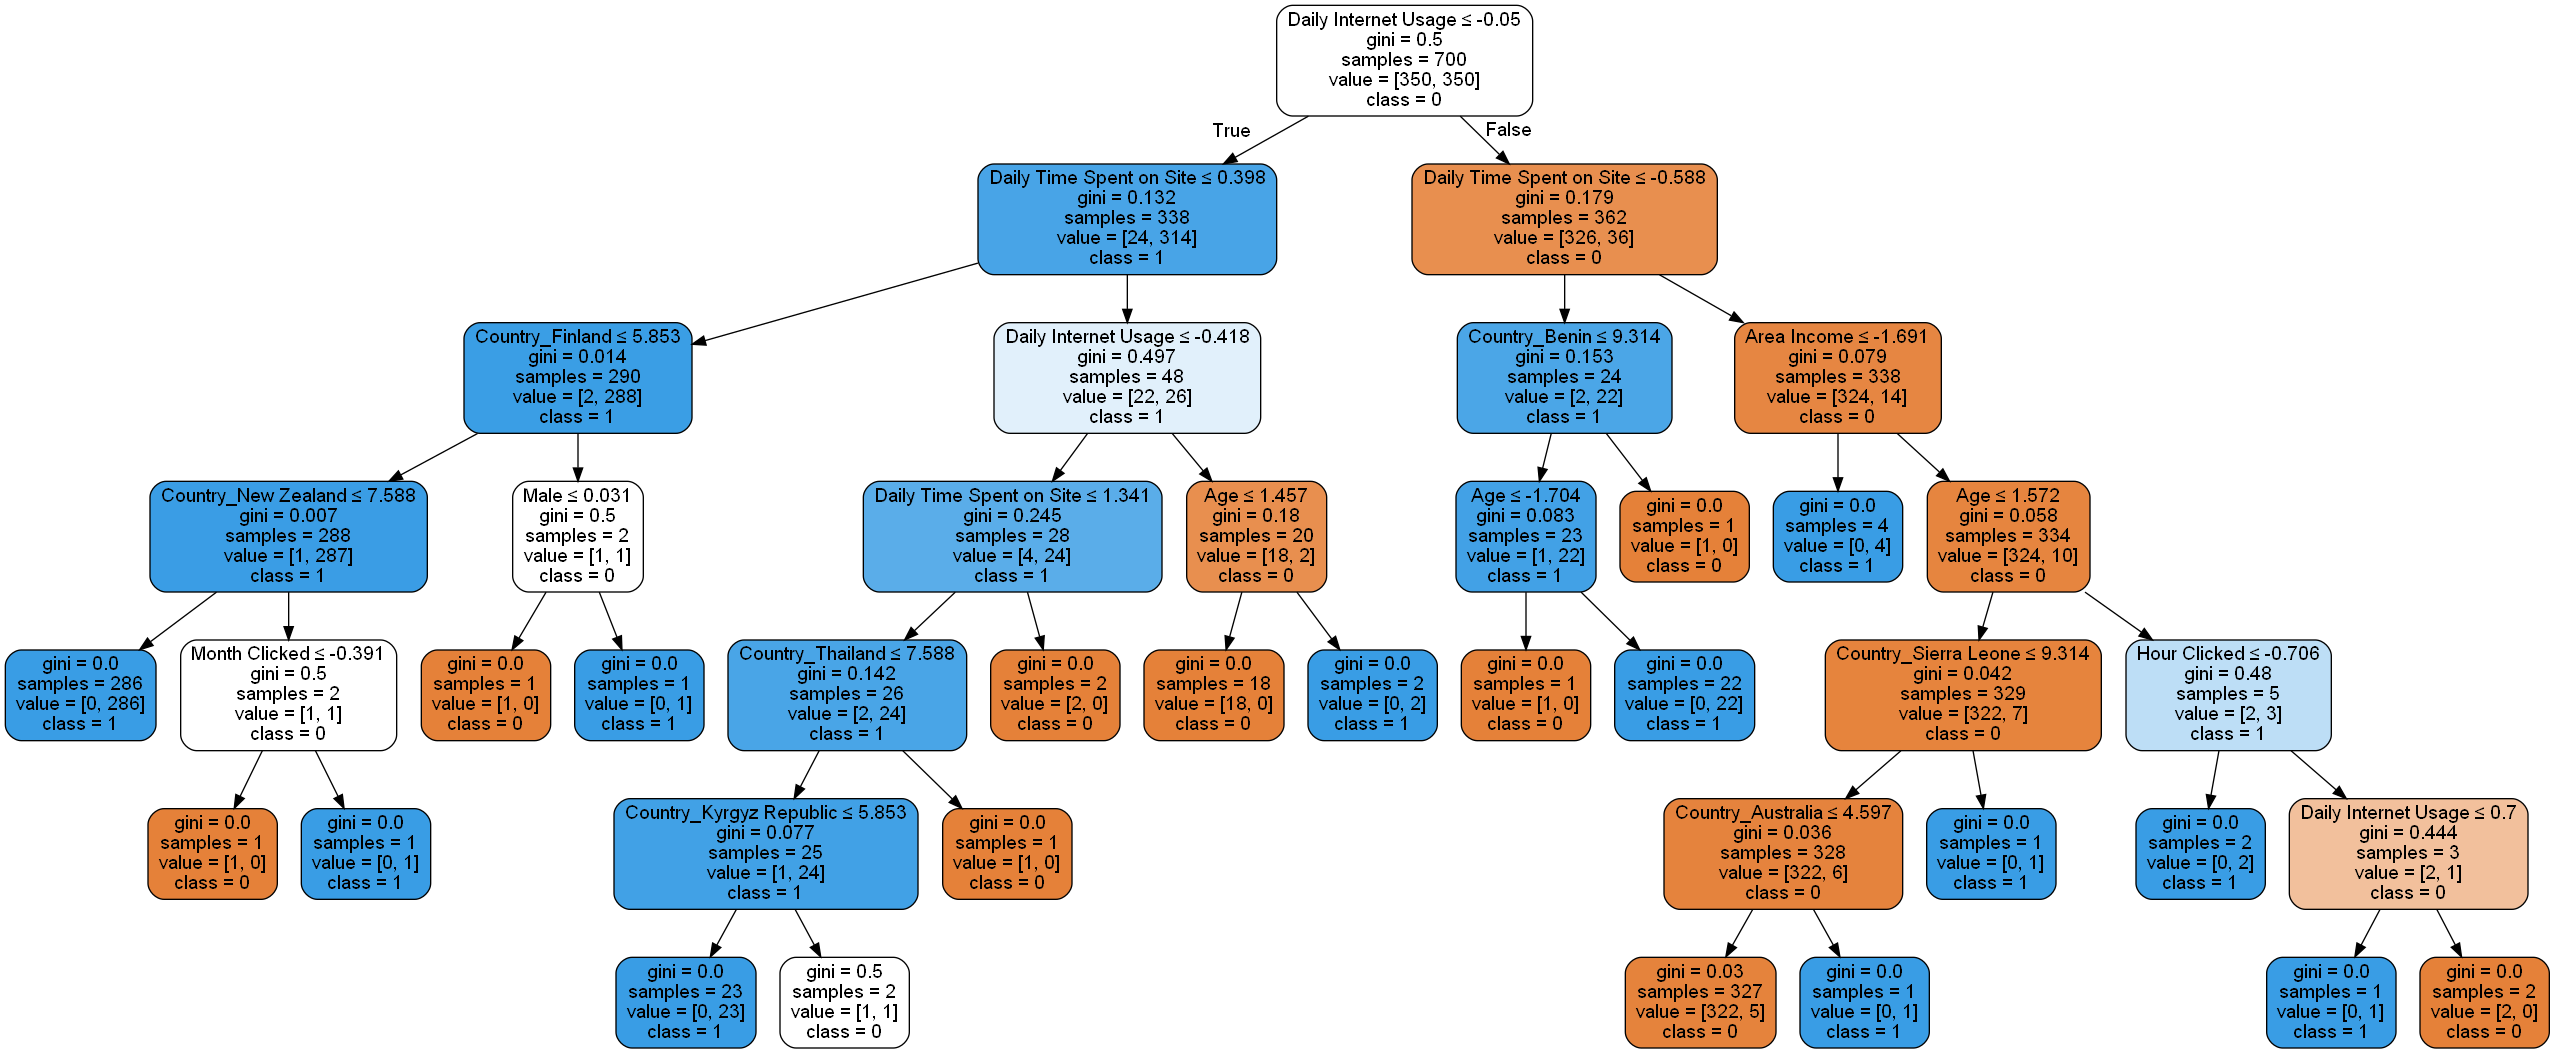

In [71]:
# Extract independent feature names
feature_cols = df_country_categories.columns

# Print decision tree
graph = visualize_tree(clf_pruned, feature_cols[:-1])
Image(graph.create_png())

Observations -
1. 'Daily Internet Usage' feature has the highest information gain, occupying the root node.
2. 'Daily Time Spent on Site' feature comes next, having second highest information gain.
3. 'Age' & 'Male' features have less information gain, coming at level 3.

###  Predict Stratified Cross Validation accuracy

In [72]:
# Extract X & y from the dataframe
col_length = len(df_country_categories.columns)
X = df_country_categories.iloc[:,0:col_length - 1]
y = df_country_categories.iloc[:, -1]

# Split the data into 7 folds. 
# Create 'kf' (StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
kf = StratifiedKFold(n_splits=7, shuffle=True, random_state=0)

cnt = 1
# split() method generate indices to split data into training and test set
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 857, Test set:143
Fold:2, Train set: 857, Test set:143
Fold:3, Train set: 857, Test set:143
Fold:4, Train set: 857, Test set:143
Fold:5, Train set: 857, Test set:143
Fold:6, Train set: 857, Test set:143
Fold:7, Train set: 858, Test set:142


In [73]:
# Generate score using cross_val_score method using Decision Tree Classifier
depth = []
for i in range(2, 20):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=kf, n_jobs=4)
    mean_score = round(scores.mean(), 4)
    depth.append((i, mean_score))
print(depth)

[(2, 0.925), (3, 0.945), (4, 0.945), (5, 0.95), (6, 0.942), (7, 0.945), (8, 0.943), (9, 0.943), (10, 0.943), (11, 0.943), (12, 0.942), (13, 0.94), (14, 0.935), (15, 0.938), (16, 0.943), (17, 0.943), (18, 0.94), (19, 0.944)]


<b>Maximum Stratified cross validation accuracy (for decision tree classifier of 7 folds) is 0.95 for depth of 5.</b>

--- END ---